<a href="https://colab.research.google.com/github/brenoslivio/SME0828_DataScience/blob/master/Projects/3%20-%20Classifica%C3%A7%C3%A3o/Projeto3_Classificacao_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SME0828 - Introdução à Ciência de Dados
# Projeto 3: Classificação 

### Alunos

Aline Fernanda da Conceição, Nº USP: 9437275

Breno Lívio Silva de Almeida, Nº USP: 10276675

Matheus Victal Cerqueira, Nº USP: 10276661

***Universidade de São Paulo, São Carlos, Brasil.***

## Exercícios sugeridos para a atividade avaliativa 3

Os seguintes exercícios foram sugeridos para entrega em 03 de novembro de 2020 para a disciplina SME0828 - Ciência de Dados oferecida pelo Instituto de Ciências Matemáticas e de Computação (ICMC) da Universidade de São Paulo (USP), a qual foi ministrada pelo professor Francisco Aparecido Rodrigues. Vamos trabalhar com o conjunto de dados [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). O dataset tem várias informações sobre características de estrelas como temperatura absoluta, luminosidade relativa, tipos de estrelas, entre outros. Vamos classificar os dados considerando vários classificadores conhecidos.



---



## Sumário

1. Desenvolvimento

  1.1 [Exercício 1](#ex1)

  1.2 [Exercício 2](#ex2)

  1.3 [Exercício 3](#ex3)

  1.4 [Exercício 4](#ex4)

  1.5 [Exercício 5](#ex5)

  1.6 [Exercício 6](#ex6)



---



## Desenvolvimento



### <a name="ex1"></a> 1 - Considere a base de dados sobre doenças cardíacas:https://www.kaggle.com/ronitf/heart-disease-uci 
### Faça o pré-processamento dos dados e classifique os pacientes de acordo com a variável “target”.  Considere os classificadores: Bayesiano paramétrico, Bayesiano não-paramétrico e Naive Bayes.

#### Pré-processamento dos dados

Foi considerada a base de dados de estrelas [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset) para o exercício. Vamos carregar seus dados.

In [2]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

dataStar = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/starsDataset.csv', 
        dtype={
          "Temperature (K)": np.int64,
          "Luminosity(L/Lo)": np.float64,
          "Radius(R/Ro)": np.float64,
          "Absolute magnitude(Mv)": np.float64,
          "Star type": np.int64,
          "Star color": str,
          "Spectral Class": str
        },
        na_values="",)

dataStar.replace("", np.nan, inplace=True)

dataStar.dropna(inplace=True)

dataStar.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
66,2945,0.00032,0.093,18.340,0,Red,M
34,5800,0.81000,0.900,5.050,3,yellow-white,F
42,3270,150000.00000,88.000,-6.020,4,Red,M
193,3212,0.00160,0.378,12.854,1,Red,M
95,11250,672.00000,6.980,-2.300,3,Blue-white,A


Temos três variáveis `Star type`, `Star color`, `Spectral Class` que podemos possivelmente indicar como labels para fazer a classificação, mas precisamos ter uma noção da frequência absoluta dos valores de cada variável.

In [3]:
dataStar['Star type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Star type, dtype: int64

In [4]:
dataStar['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
Blue white              3
white                   3
yellowish               2
Orange                  2
Whitish                 2
Pale yellow orange      1
Blue white              1
Yellowish               1
Blue-White              1
White-Yellow            1
Blue                    1
Orange-Red              1
Name: Star color, dtype: int64

In [5]:
dataStar['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Com certeza devemos usar `Star type` como nosso label para classificação, por conta da distribuição igual de dados que foi apresentada, diferentemente das outras variáveis que contam com valores que aparecem somente uma vez. O dataset foi feito justamente para a classificação considerando os tipos de estrelas, mas é interessante ter uma análise para entender o porquê disso.

Dependendo da relação dessas variáveis que foram descartadas como possível label, podemos até usar usando a função do Pandas [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) para transformar facilmente em valores binários por coluna. Porém, para fácil visualização na tabela, será usado apenas uma coluna com essa ideia de ter valores inteiro usando a [biblioteca do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) própria pra isso.

In [6]:
dataConcat = dataStar.copy()

# Método usando get_dummies para várias colunas

#Spectral = pd.get_dummies(dataConcat['Spectral Class'], drop_first=True)
#dataConcat.drop('Spectral Class',axis=1,inplace=True)
#dataConcat = pd.concat([dataConcat, Spectral],axis=1)

#Color = pd.get_dummies(dataConcat['Star color'], drop_first=True)
#dataConcat.drop('Star color',axis=1,inplace=True)
#dataConcat = pd.concat([dataConcat, Color],axis=1)

# Metodo com LabelEncoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in list(dataConcat.columns):
    if dataConcat[i].dtype=='object':
        dataConcat[i]=le.fit_transform(dataConcat[i])

dataConcat.sample(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
239,37882,294903.000000,1783.0000,-7.800,5,0,6
79,3158,0.001350,0.1610,13.980,1,10,5
129,2731,0.000437,0.0856,18.090,0,10,5
107,12893,184000.000000,36.0000,-6.340,4,0,6
229,21738,748890.000000,92.0000,-7.346,4,0,6


Vamos pegar as classes nessa variável `Star type`.

In [7]:
# Nomes das classes
classes = np.array(pd.unique(dataConcat[dataConcat.columns[-3]]), dtype = np.int64)  

# Atributos do dataset
attributes = list(dataConcat.columns)

classes

array([0, 1, 2, 3, 4, 5])

Vamos converter o data frame para um array numpy com a intenção de manipular melhor com bibliotecas próprias para a classificação.

In [8]:
data = dataConcat.to_numpy()
data

array([[3.06800e+03, 2.40000e-03, 1.70000e-01, ..., 0.00000e+00,
        1.00000e+01, 5.00000e+00],
       [3.04200e+03, 5.00000e-04, 1.54200e-01, ..., 0.00000e+00,
        1.00000e+01, 5.00000e+00],
       [2.60000e+03, 3.00000e-04, 1.02000e-01, ..., 0.00000e+00,
        1.00000e+01, 5.00000e+00],
       ...,
       [8.82900e+03, 5.37493e+05, 1.42300e+03, ..., 5.00000e+00,
        1.10000e+01, 0.00000e+00],
       [9.23500e+03, 4.04940e+05, 1.11200e+03, ..., 5.00000e+00,
        1.10000e+01, 0.00000e+00],
       [3.78820e+04, 2.94903e+05, 1.78300e+03, ..., 5.00000e+00,
        0.00000e+00, 6.00000e+00]])

Separando a variável para label com as features

In [9]:
dataTrain = data
y = dataTrain[:, 4] # Pega o label que iremos classificar, o tipo de estrela
dataTrain = np.delete(dataTrain, 4, 1)
X = dataTrain # Pega os valores que sobraram para a classificação das estrelas

Vamos normalizar os dados para evitar o efeito da escala dos atributos envolvidos.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Por fim, separando os dados de forma que tenha o conjunto de dados para treino e o conjunto de dados para teste para poder testar se o treino foi efetivo. Ou seja, esses dados servem para ver se foi possível generalizar o suficiente considerando que eles não estavam no conjunto de dados para treino, sendo totalmente novos.

In [11]:
from sklearn.model_selection import train_test_split
p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

Para alguns casos, é interessante usar a ideia de [Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html) para escolhermos as variáveis que realmente nos ajude a obter uma melhor classificação. Se a nossa classificação não lidasse com uma variável categórica, poderíamos até trabalhar com a ideia de observar as variáveis com a melhor [correlação com a variável target](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b) para a filtragem. Vamos analisar a [informação mútua](https://en.wikipedia.org/wiki/Mutual_information) entre as variáveis.

In [12]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import feature_selection

sf = SelectKBest(score_func = feature_selection.mutual_info_classif, k='all')

features = np.delete(attributes, 4)

x_t = x_train.copy()
y_t = y_train.copy()

sf_fit = sf.fit(x_train, y_train)

for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (features[i], sf_fit.scores_[i]))

 Temperature (K): 0.645270
 Luminosity(L/Lo): 1.056192
 Radius(R/Ro): 1.720290
 Absolute magnitude(Mv): 1.562487
 Star color: 0.803087
 Spectral Class: 0.632945


Vamos colocar as features em ordem descendente dos scores obtidos.

In [13]:
bestFeatures = pd.DataFrame()
bestFeatures['feature'] = features[range(len(sf_fit.scores_))]
bestFeatures['scores'] = sf_fit.scores_
bestFeatures = bestFeatures.sort_values(by='scores', ascending = False)
bestFeatures

,feature,scores
2,Radius(R/Ro),1.720290
3,Absolute magnitude(Mv),1.562487
1,Luminosity(L/Lo),1.056192
4,Star color,0.803087
0,Temperature (K),0.645270
5,Spectral Class,0.632945


Após alguns testes com as features de melhores scores, foi visto que todas são adequadas ao nosso problema de classificação, tendo bons valores de acurácia para os três classificadores que vamos usar. Vamos usar todas as variáveis.

In [14]:
dataTrain = data
y = dataTrain[:, 4] # Pega o label que iremos classificar, o tipo de estrela
dataTrain = np.delete(dataTrain, 4, 1) # Apaga coluna com a label

X = dataTrain # Pega os valores que sobraram para a classificação das estrelas

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

#### Classificador Bayesiano paramétrico

Vamos realizar propriamente a classificação que utiliza propriamente da ideia de encontrar a função densidade de probabilidade da [distribuição normal multivariada](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) do conjunto X, os dados escolhidos para o treino.

In [15]:
from scipy.stats import multivariate_normal

# P irá guardar a probabilidade para as linhas e colunas
P = pd.DataFrame(data = np.zeros((x_test.shape[0], len(classes))), columns = classes) 

Pc = np.zeros(len(classes)) # A fração de elementos em cada classe
for i in np.arange(0, len(classes)):
    elements = tuple(np.where(y_train == classes[i]))
    Pc[i] = len(elements)/len(y_train)
    Z = x_train[elements,:][0]
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z)) # Matriz de covariância da distribuição
    for j in np.arange(0,x_test.shape[0]):
        x = x_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]

Gerado o modelo podemos testar com a distribuição guardada para testes com o intuito de validar o modelo e verificar sua acurácia.

In [16]:
from sklearn.metrics import accuracy_score

y_pred = []

for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]])) # Pega a classe/coluna com maior chance de ser
    y_pred.append(classes[c])

y_pred = np.array(y_pred, dtype = np.int64)

score = accuracy_score(y_pred, y_test)
print('Acurácia da classificação Bayesiana paramétrica:', score)

Acurácia da classificação Bayesiana paramétrica: 0.9583333333333334


#### Classificador Bayesiano não-paramétrico

Com um estimador não-paramétrico, consideramos que não conhecemos a função de distribuição dos nossos dados, não conhecendo os parâmetros envolvidos. Praticamente vai envolver a criação e convolução de distribuições normais acerca de um conjunto dos nossos dados com a intenção de achar curvas que irão ajudar na classificação. Vamos usar do kernel de gaussiana da [biblioteca do sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html).

In [17]:
from sklearn.neighbors import KernelDensity

P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes) 
Pc = np.zeros(len(classes)) 

h = 1 # Esse valor será melhor discutido no próximo exercício

for i in np.arange(0, len(classes)): 
    elements = tuple(np.where(y_train == classes[i])) 
    Pc[i] = len(elements)/len(y_train) 
    Z = x_train[elements,:][0] 
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): 
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        pj = np.exp(kde.score_samples(x)) 
        P[classes[i]][j] = pj*Pc[i]

A variável `h` usada no código tem uma relevância importante com a possibilidade de formarmos curvas suscetíveis a ruídos, menos suave (overfitting), sendo valores mais baixos, e também curvas que podemos perder mais dados, mais suave (underfitting), sendo valores mais altos. Por isso devemos sempre focar em achar um valor razoável. Isso será melhor discutido no próximo exercício usando desse mesmo conjunto de dados.

Vamos, por fim, calcular a acurácia da forma que fizemos anteriormente.

In [18]:
from sklearn.metrics import accuracy_score

y_pred = [] 

for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])

y_pred = np.array(y_pred, dtype = np.int64)

score = accuracy_score(y_pred, y_test)

print('Acurácia da classificação Bayesiana não-paramétrica:', score)

Acurácia da classificação Bayesiana não-paramétrica: 0.9375


#### Classificador Naive Bayes

Esse tipo de classificador usa da teoria Bayesiana mas considerando a hipótese "naive" que os atributos trabalhados são independentes. Vamos usar da [implementação do próprio sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) que considera os dados já em uma distribuição normal (existem funções da biblioteca de Naive Bayes que lida com outras distribuições).

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)

print('Acurácia da classificação Naive Bayes:', score)

Acurácia da classificação Naive Bayes: 0.9583333333333334


É interessante notar que o classificador Naive Bayes funciona muito bem para aplicações do mundo real, mas parece [não funcionar tão bem como estimador](https://scikit-learn.org/stable/modules/naive_bayes.html), então sempre é interessante comparar com outros classificadores para escolhermos nossa opção dependendo do nosso conjunto de dados.

### <a name="ex2"></a> 2 - No classificar não-paramétrico, verifique o efeito do hiperparâmetro h na classificação dos dados de diabetes, encontrando seu melhor valor: https://www.kaggle.com/uciml/pima-indians-diabetes-database


Vamos trabalhar com o mesmo conjunto de dados do exercício anterior, [*Star dataset to predict star types*](https://www.kaggle.com/deepu1109/star-dataset). Vamos primeiro carregar os dados novamente.

In [20]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dataStar = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/starsDataset.csv', 
        dtype={
          "Temperature (K)": np.int64,
          "Luminosity(L/Lo)": np.float64,
          "Radius(R/Ro)": np.float64,
          "Absolute magnitude(Mv)": np.float64,
          "Star type": np.int64,
          "Star color": str,
          "Spectral Class": str
        },
        na_values="",)

dataStar.replace("", np.nan, inplace=True)

dataStar.dropna(inplace=True)

dataConcat = dataStar.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in list(dataConcat.columns):
    if dataConcat[i].dtype=='object':
        dataConcat[i]=le.fit_transform(dataConcat[i])

classes = np.array(pd.unique(dataConcat[dataConcat.columns[-3]]), dtype=str) 

data = dataConcat.to_numpy()

dataTrain = data
y = dataTrain[:, 4] # Pega o label que iremos classificar, o tipo de estrela
dataTrain = np.delete(dataTrain, 4, 1)
X = dataTrain # Pega os valores que sobraram para a classificação das estrelas

Para definir o melhor valor para o hiperparâmetro `h` na classificação Bayesiana não-paramétrica precisamos entender como é a disposição das distribuições gaussianas realizadas com o intuito de encontrar as probabilidades para a classificação. O hiperparâmetro acaba controlando a abertura da função, e como já falado anteriomente, quanto menor for, por mais que a acurácia geralmente aumente, a classificação fica suscetível a ruídos. E se o valor for muito alto, podemos perder até dados relevantes. Vamos então explorar como algumas variáveis usadas na classificação se comportam com a mudança desse valor.

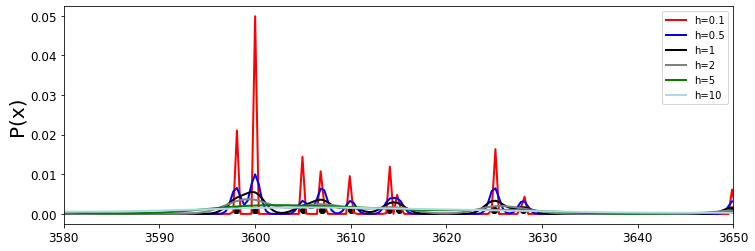

In [21]:
import numpy as np
from matplotlib.pyplot import cm
from sklearn.neighbors import KernelDensity

color=['red', 'blue', 'black', 'gray', 'green', 'lightblue']

X_Feat = X[:, 0]
X_Feat = X_Feat.reshape((len(X_Feat), 1))

X_plot = np.linspace(np.min(X_Feat), np.max(X_Feat), 100000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X_Feat, 0.001*np.ones(X_Feat.shape[0]), 'ok')
plt.xlim((3580, 3650))

c = 0 

vh = [0.1, 0.5, 1, 2, 5, 10]

for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X_Feat)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1

plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)
plt.show(True)

Note que com valor de `h = 0.1` temos uma curva pouco suave, considerando apenas um dado de forma individual para a distribuição gaussiana. Valores entre `h = 1` e `h = 2` parecem abranger de forma mais suave os dados.

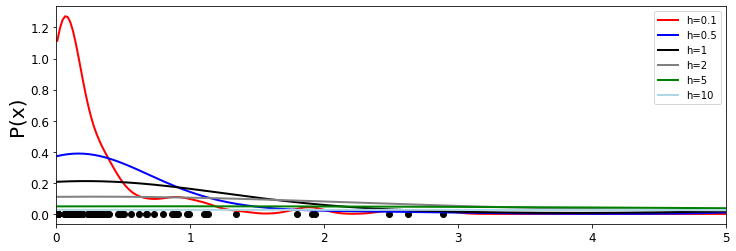

In [22]:
import numpy as np
from matplotlib.pyplot import cm
from sklearn.neighbors import KernelDensity

color=['red', 'blue', 'black', 'gray', 'green', 'lightblue']

X_Feat = X[:, 2]
X_Feat = X_Feat.reshape((len(X_Feat), 1))

X_plot = np.linspace(np.min(X_Feat), np.max(X_Feat), 100000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X_Feat, 0.001*np.ones(X_Feat.shape[0]), 'ok')
plt.xlim((0, 5))

c = 0 

vh = [0.1, 0.5, 1, 2, 5, 10]

for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X_Feat)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1

plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)
plt.show(True)

Para essa outra variável, note como o valor de `h = 0.1` deixa a curva tão alta que temos valores que passam de `P(X) = 1`.

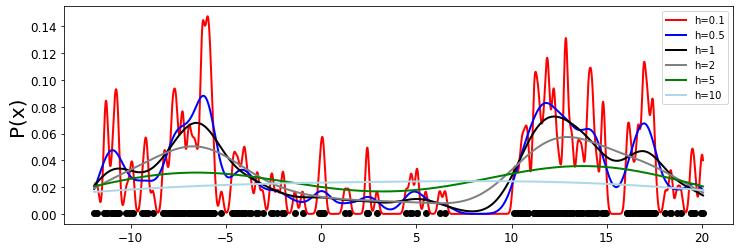

In [23]:
import numpy as np
from matplotlib.pyplot import cm
from sklearn.neighbors import KernelDensity

color=['red', 'blue', 'black', 'gray', 'green', 'lightblue']

X_Feat = X[:, 3]
X_Feat = X_Feat.reshape((len(X_Feat), 1))

X_plot = np.linspace(np.min(X_Feat), np.max(X_Feat), 100000)[:, np.newaxis]

plt.figure(figsize=(12,4))
plt.plot(X_Feat, 0.001*np.ones(X_Feat.shape[0]), 'ok')

c = 0 

vh = [0.1, 0.5, 1, 2, 5, 10]

for h in vh:
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X_Feat)
    log_dens = np.exp(kde.score_samples(X_plot)) # score_samples() returns the log density.
    plt.plot(X_plot,log_dens, color = color[c], linewidth=2, label = 'h='+str(h))
    c = c + 1

plt.ylabel('P(x)', fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize = 10)
plt.show(True)

Para essa outra variável, vemos a mesma ideia ocorrendo. Um valor de h razoável seria algo como `h = 1` para a estimação. Entretanto a discussão sobre esse melhor valor realmente não é tão trivial e pode ter [discussões mais profundas](https://arxiv.org/pdf/math/0504511.pdf) para essa decisão.

### 8 - Considere as bases:  Vehicle, winequality-red e vertebralcolumn-3C. Compare os classificadores:  (a) Naive Bayes, (b) Florestas aleatórias, (c) k-vizinhos, (d) regressão logística. Considere as medidas: (i) AUC (área sob a curva ROC), (ii) precisão, (iii) medida F1 e (iv) acurácia.  Ou seja, faça uma tabela para cada base, onde as linhas representam os classificadores e as colunas, as medidas de avaliação.

Vamos criar uma classe que organizará os métodos que vão classificar cada uma das bases.

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import precision_score, roc_auc_score, classification_report, accuracy_score, f1_score
from sklearn.preprocessing import label_binarize

class Classification:
    # Colocamos como parâmetros iniciais os dados de treino e teste de um dataset
    def __init__(self, name, x_train, x_test, y_train, y_test):
        self.name = name
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo Naive Bayes
    def naiveBayes(self):
        model = GaussianNB()
        model.fit(self.x_train, self.y_train)

        return model.predict(self.x_test)

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo Random Forest
    def randomForest(self, estimators):
        model = RandomForestClassifier(n_estimators = estimators, bootstrap = True, class_weight = None, criterion = 'gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_jobs=1,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
        model.fit(self.x_train, self.y_train)

        return model.predict(self.x_test)

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo knn
    def knn(self, k):
        model = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
        model.fit(self.x_train, self.y_train)
        
        return model.predict(self.x_test) 

    # Função retorna um array da predição da classe com nosso conjunto teste com o modelo Logistic Regression
    def logReg(self):
        model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
        model.fit(self.x_train, self.y_train)

        return model.predict(self.x_test)

    # O AUC retorna a área sob a curva ROC, no caso a média dos AUC's
    def auc(self, y_pred):
        # Binarização de y_test com (n_samples, n_classes)
        ytest = label_binarize(self.y_test, classes = y_test.unique())

        # Binarização de y_pred com (n_samples, n_classes)
        ypreds = label_binarize(y_pred, classes = y_test.unique())

        # É feito a média dos AUC's considerando o ROC feito na comparação ovo = one versus one
        roc = roc_auc_score(ytest, ypreds, multi_class = 'ovo', average = 'macro')

        return roc

    # Retorna a precisão obtida com a classificação
    def precision(self, y_pred):
        return precision_score(self.y_test, y_pred, average = 'macro')

    # Retorna a medida F1 para a classificação
    def f1(self, y_pred):
        return f1_score(self.y_test, y_pred, average = 'macro')

    # Retorna a acurácia da classificação
    def accuracy(self, y_pred):
        return accuracy_score(y_pred, self.y_test)


#### Vehicle dataset

Primeiramente vamos carregar os dados da base.

In [84]:
import pandas as pd
import numpy as np

dfVehicle = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/Vehicle.csv', header = (0))

# Convertendo a classe para tipo categórico
dfVehicle['Class'] = pd.Categorical(dfVehicle['Class']) 

dfVehicle.sample(5)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
270,82,45,68,150,69,5,148,45,19,144,169,322,184,80,5,0,181,184,bus
223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186,bus
288,96,47,103,215,69,10,200,33,23,147,220,598,200,73,6,6,187,194,opel
43,93,37,76,183,63,8,164,40,20,134,191,405,139,67,4,7,192,197,saab
292,87,42,76,159,65,5,155,42,19,138,184,362,157,76,6,12,189,193,bus


Vamos arrumar os dados de treino fazendo a normalização necessária

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pega desde a primeira à penúltima coluna
X = dfVehicle.loc[:, "Comp":"Holl.Ra"]

# Normalização
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

y = dfVehicle["Class"]

p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

Vamos fazer a classificação com a classe feita no Python com os métodos que correspondem às classificações que iremos usar.

In [86]:
classVehicle = Classification('Vehicle', x_train, x_test, y_train, y_test)

##### Naive Bayes

In [87]:
print('AUC:', classVehicle.auc(classVehicle.naiveBayes()))
print('Precision:', classVehicle.precision(classVehicle.naiveBayes()))
print('F1 score:', classVehicle.f1(classVehicle.naiveBayes()))
print('Accuracy:', classVehicle.accuracy(classVehicle.naiveBayes()))

AUC: 0.6780312350831071
Precision: 0.5677423256814149
F1 score: 0.4601418211695781
Accuracy: 0.5


##### Random Forest

Note que iremos usar um número de estimadores sendo 100 para esse modelo, que foi considerado razoável para a classificação. 

In [88]:
print('AUC:', classVehicle.auc(classVehicle.randomForest(100)))
print('Precision:', classVehicle.precision(classVehicle.randomForest(100)))
print('F1 score:', classVehicle.f1(classVehicle.randomForest(100)))
print('Accuracy:', classVehicle.accuracy(classVehicle.randomForest(100)))

AUC: 0.8307218481654957
Precision: 0.7242580499159447
F1 score: 0.7429705884071748
Accuracy: 0.7705882352941177


##### k-NN

Vamos usar k como igual a 10, um número razoável de vizinhos para a classificação.

In [89]:
print('AUC:', classVehicle.auc(classVehicle.knn(10)))
print('Precision:', classVehicle.precision(classVehicle.knn(10)))
print('F1 score:', classVehicle.f1(classVehicle.knn(10)))
print('Accuracy:', classVehicle.accuracy(classVehicle.knn(10)))

AUC: 0.8155189119484756
Precision: 0.7013518403093241
F1 score: 0.7017241379310345
Accuracy: 0.7294117647058823


##### Logistic Regression

In [90]:
print('AUC:', classVehicle.auc(classVehicle.logReg()))
print('Precision:', classVehicle.precision(classVehicle.logReg()))
print('F1 score:', classVehicle.f1(classVehicle.logReg()))
print('Accuracy:', classVehicle.accuracy(classVehicle.logReg()))

AUC: 0.8596001830611271
Precision: 0.7758603476626732
F1 score: 0.7761411588824042
Accuracy: 0.7941176470588235


##### Tabela para o dataset Vehicle

Por fim, colocamos os valores obtidos em uma tabela para a melhor visualização.

In [91]:
nb = ['Naive Bayes', classVehicle.auc(classVehicle.naiveBayes()), classVehicle.precision(classVehicle.naiveBayes()), classVehicle.f1(classVehicle.naiveBayes()), classVehicle.accuracy(classVehicle.naiveBayes())]

rnfor = ['Random Forest', classVehicle.auc(classVehicle.randomForest(100)), classVehicle.precision(classVehicle.randomForest(100)), classVehicle.f1(classVehicle.randomForest(100)), classVehicle.accuracy(classVehicle.randomForest(100))]

kn = ['k-NN', classVehicle.auc(classVehicle.knn(10)), classVehicle.precision(classVehicle.knn(10)), classVehicle.f1(classVehicle.knn(10)), classVehicle.accuracy(classVehicle.knn(10))]

logr = ['Logistic Regression', classVehicle.auc(classVehicle.logReg()), classVehicle.precision(classVehicle.logReg()), classVehicle.f1(classVehicle.logReg()), classVehicle.accuracy(classVehicle.logReg())]

data = [nb, rnfor, kn, logr] 

tableVehicle = pd.DataFrame(data, columns = ['Classificador', 'AUC', 'Precisão', 'Medida F1', 'Acurácia']) 

tableVehicle.set_index('Classificador')

,AUC,Precisão,Medida F1,Acurácia
Classificador,,,,
Naive Bayes,0.678031,0.567742,0.460142,0.500000
Random Forest,0.828850,0.710441,0.727412,0.764706
k-NN,0.815519,0.701352,0.701724,0.729412
Logistic Regression,0.859600,0.775860,0.776141,0.794118


Conclusões mais produndas sobre os resultados obtidos serão colocados no final do exercício.

#### Wine dataset

O mesmo procedimento para carregar as bases.

In [92]:
dfWine = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/winequality-red.csv', header = (0))

# Convertendo a classe para tipo categórico
dfWine['quality'] = pd.Categorical(dfWine['quality']) 

dfWine.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1136,10.4,0.52,0.45,2.0,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6
1142,6.9,0.45,0.11,2.4,0.043,6.0,12.0,0.99354,3.30,0.65,11.4,6
195,7.8,0.59,0.33,2.0,0.074,24.0,120.0,0.99680,3.25,0.54,9.4,5
1337,6.0,0.50,0.00,1.4,0.057,15.0,26.0,0.99448,3.36,0.45,9.5,5
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6,6


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pega desde a primeira à penúltima coluna
X = dfWine.loc[:, "fixed acidity":"alcohol"]

# Normalização
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

y = dfWine["quality"]

p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [94]:
classWine = Classification('Wine', x_train, x_test, y_train, y_test)

##### Tabela para o dataset Wine

Já fazendo o procedimento de colocar os valores em uma tabela.

In [95]:
nb = ['Naive Bayes', classWine.auc(classWine.naiveBayes()), classWine.precision(classWine.naiveBayes()), classWine.f1(classWine.naiveBayes()), classWine.accuracy(classWine.naiveBayes())]

rnfor = ['Random Forest', classWine.auc(classWine.randomForest(100)), classWine.precision(classWine.randomForest(100)), classWine.f1(classWine.randomForest(100)), classWine.accuracy(classWine.randomForest(100))]

kn = ['k-NN', classWine.auc(classWine.knn(10)), classWine.precision(classWine.knn(10)), classWine.f1(classWine.knn(10)), classWine.accuracy(classWine.knn(10))]

logr = ['Logistic Regression', classWine.auc(classWine.logReg()), classWine.precision(classWine.logReg()), classWine.f1(classWine.logReg()), classWine.accuracy(classWine.logReg())]

data = [nb, rnfor, kn, logr] 

tableWine = pd.DataFrame(data, columns = ['Classificador', 'AUC', 'Precisão', 'Medida F1', 'Acurácia']) 

tableWine.set_index('Classificador')

,AUC,Precisão,Medida F1,Acurácia
Classificador,,,,
Naive Bayes,0.598283,0.312054,0.310130,0.546875
Random Forest,0.613560,0.320247,0.325723,0.650000
k-NN,0.582987,0.290703,0.282711,0.578125
Logistic Regression,0.578982,0.427095,0.283873,0.575000


Note que as acurácias para os modelos não muito altas devido a termos que classificar considerando várias labels com um bom desbalanceamento. Para uma melhor classificação seria interessante agrupar em intervalos que indiquem uma certa qualidade do vinho além de outras técnicas para lidar com uma distribuição desbalanceada como 

In [96]:
dfWine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

#### Vertebral Column dataset

O mesmo procedimento para carregar as bases.

In [97]:
dfVert = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/vertebralcolumn-3C.csv', header = (0))

# Convertendo a classe para tipo categórico
dfVert['class'] = pd.Categorical(dfVert['class']) 

dfVert.sample(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
69,58.599529,-0.261499,51.500000,58.861028,102.042812,28.059697,Spondylolisthesis
215,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
275,67.289712,16.717514,51.000000,50.572198,137.591778,4.960344,Normal
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,Normal
126,70.676898,21.704402,59.181161,48.972496,103.008354,27.810148,Spondylolisthesis


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pega desde a primeira à penúltima coluna
X = dfVert.loc[:, "pelvic_incidence":"degree_spondylolisthesis"]

# Normalização
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

y = dfVert["class"]

p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

In [99]:
classVert = Classification('Vertebral Column', x_train, x_test, y_train, y_test)

##### Tabela para o dataset Vertebral Column

Já fazendo o procedimento de colocar em uma tabela.

In [100]:
nb = ['Naive Bayes', classVert.auc(classVert.naiveBayes()), classVert.precision(classVert.naiveBayes()), classVert.f1(classVert.naiveBayes()), classVert.accuracy(classVert.naiveBayes())]

rnfor = ['Random Forest', classVert.auc(classVert.randomForest(100)), classVert.precision(classVert.randomForest(100)), classVert.f1(classVert.randomForest(100)), classVert.accuracy(classVert.randomForest(100))]

kn = ['k-NN', classVert.auc(classVert.knn(10)), classVert.precision(classVert.knn(10)), classVert.f1(classVert.knn(10)), classVert.accuracy(classVert.knn(10))]

logr = ['Logistic Regression', classVert.auc(classVert.logReg()), classVert.precision(classVert.logReg()), classVert.f1(classVert.logReg()), classVert.accuracy(classVert.logReg())]

data = [nb, rnfor, kn, logr] 

tableVert = pd.DataFrame(data, columns = ['Classificador', 'AUC', 'Precisão', 'Medida F1', 'Acurácia']) 

tableVert.set_index('Classificador')

,AUC,Precisão,Medida F1,Acurácia
Classificador,,,,
Naive Bayes,0.880017,0.833384,0.825859,0.870968
Random Forest,0.832071,0.806318,0.751221,0.838710
k-NN,0.840890,0.761828,0.764395,0.806452
Logistic Regression,0.864108,0.800357,0.798046,0.854839


#### Conclusões acerca dos resultados obtidos

É muito importante notar primeiramente que para cada base de dados tivemos classificadores que desempenharam melhores resultados em uma, mas resultados mais medíocres em outra. Para a classificação de veículos, regressão logística foi melhor, para qualidade do vinho, floresta aleatória (notando que a base de dados já não era muito para classificação) e para coluna vertebral, Naive Bayes. Realmente não conseguimos definir o melhor modelo que sirva para todos os problemas (No free lunch theorem). Ao visualizar as tabelas geradas, os valores de acurácia acabam tendo pouca importância para se avaliar os classificadores. 

A questão mais problemática de lidar com as bases foi por conta de trabalhar a curva ROC (Receiving Operating Characteristics), que tem sua análise originalmente limitada à classificação binária. Entretanto daí surge a ideia de fazer a curva ROC fazendo a combinação dois a dois das classes, como observada da [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) para se calcular a AUC (Area Under Curve) da ROC. Como o algoritmo necessita da ideia da classificação binária, podemos fazer a [binarização](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html) das labels em um modelo de "one vs all".

Para bases com dados desbalanceados, por exemplo, quando você tem um desbalanceamento de dados entre amostras positivas e negativas, é preferível usar a medida F1 porque as médias ROC usam todos os thresholds de decisão envolvidos. Então possivelmente o valores AUC obtido para a base de qualidade de vinho seriam pouco adequados. Por isso é muito importante ver o balanceamento da base antes de tomar conclusões acerca dos valores resultantes da análise de performance de nossos modelos.



### 10 - Realize a classificação da base Titanic. Use os métodos de seleção de modelos e determine o melhormodelo e seus hiperparâmetros.

In [3]:
import pandas as pd
import numpy as np

dfTitanicTest = pd.read_csv('https://raw.githubusercontent.com/brenoslivio/SME0828_DataScience/master/Projects/data/titanic/test.csv?token=AGKBUXZCU72RJ3NI6IX6AQ2723DTC', header = (0))

dfTitanicTest.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
226,1118,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S
139,1031,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9000,NaN,S
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S


In [4]:
dfTitanicTest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# Convertendo a classe para tipo categórico
for i in dfTitanicTest.columns:
    if (str(dfTitanicTest[i].dtype) == 'object'):
        dfTitanicTest[i] = pd.Categorical(dfTitanicTest[i])

dfTitanicTest.dtypes

PassengerId       int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pega desde a primeira à penúltima coluna
X = dfWine.loc[:, "fixed acidity":"alcohol"]

# Normalização
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

y = dfWine["quality"]

p = 0.8 # Fração de elementos que iremos usar no treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)